In [1]:
import pandas as pd
from plotnine import *

df = pd.read_csv('NCES_Data_30Col.csv')

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23503 entries, 0 to 23502
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SCH_ID           23503 non-null  int64  
 1   X1NCESID         23503 non-null  int64  
 2   W1MATHTCH        23503 non-null  float64
 3   W1SCITCH         23503 non-null  float64
 4   W3HSTRANS        23503 non-null  float64
 5   X1SEX            23503 non-null  int64  
 6   X1RACE           23503 non-null  int64  
 7   X1TXMTH          23503 non-null  float64
 8   X1TXMSEM         23503 non-null  float64
 9   X1TXMSCR         23503 non-null  float64
 10  X1TXMTSCOR       23503 non-null  float64
 11  X1TXMQUINT       23503 non-null  int64  
 12  X1TXMPROF1       23503 non-null  float64
 13  X1TXMPROF2       23503 non-null  float64
 14  X1TXMPROF3       23503 non-null  float64
 15  X1TXMPROF4       23503 non-null  float64
 16  X1TXMPROF5       23503 non-null  float64
 17  X1PAR1OCC_ST

,SCH_ID,X1NCESID,W1MATHTCH,W1SCITCH,W3HSTRANS,X1SEX,X1RACE,X1TXMTH,X1TXMSEM,X1TXMSCR,...,X1PAR2OCC_STEM2,X1PAREDU,X1FAMINCOME,X1MTHID,X1MTHUTI,X1MTHEFF,X1MTHINT,X1SCIUTI,X1SCIEFF,X1SCIINT
count,23503.0,23503.0,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,...,23503.0,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000
mean,-5.0,-5.0,170.464427,158.207336,178.353060,1.487768,5.531209,-0.669273,-0.459058,35.964517,...,-5.0,0.057908,1.009531,-0.775739,-1.546246,-1.515598,-1.660666,-1.969322,-1.966977,-2.099340
std,0.0,0.0,281.883100,283.490653,232.976019,0.527204,3.759044,2.453563,2.337071,17.791104,...,0.0,5.258974,6.268507,2.625987,3.200048,3.237070,3.354718,3.436099,3.458624,3.543791
min,-5.0,-5.0,0.000000,0.000000,0.000000,-9.000000,-9.000000,-8.000000,-8.000000,-8.000000,...,-5.0,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,-5.0,-5.0,0.000000,0.000000,50.546281,1.000000,4.000000,-0.836500,0.235100,27.822350,...,-5.0,-8.000000,-8.000000,-1.130000,-1.560000,-1.410000,-1.810000,-7.000000,-7.000000,-7.000000
50%,-5.0,-5.0,78.693159,62.512007,121.227823,1.000000,8.000000,-0.077400,0.252200,39.029100,...,-5.0,2.000000,3.000000,0.000000,-0.300000,-0.170000,-0.240000,-0.330000,-0.360000,-0.300000
75%,-5.0,-5.0,232.155865,232.256733,229.327123,2.000000,8.000000,0.639000,0.275700,48.189450,...,-5.0,4.000000,5.000000,0.600000,0.670000,0.270000,0.490000,0.230000,0.250000,0.490000
max,-5.0,-5.0,4198.712927,6878.969497,6162.227572,2.000000,8.000000,3.028300,0.615100,69.931700,...,-5.0,7.000000,13.000000,1.760000,1.310000,1.620000,2.080000,1.690000,1.830000,2.030000


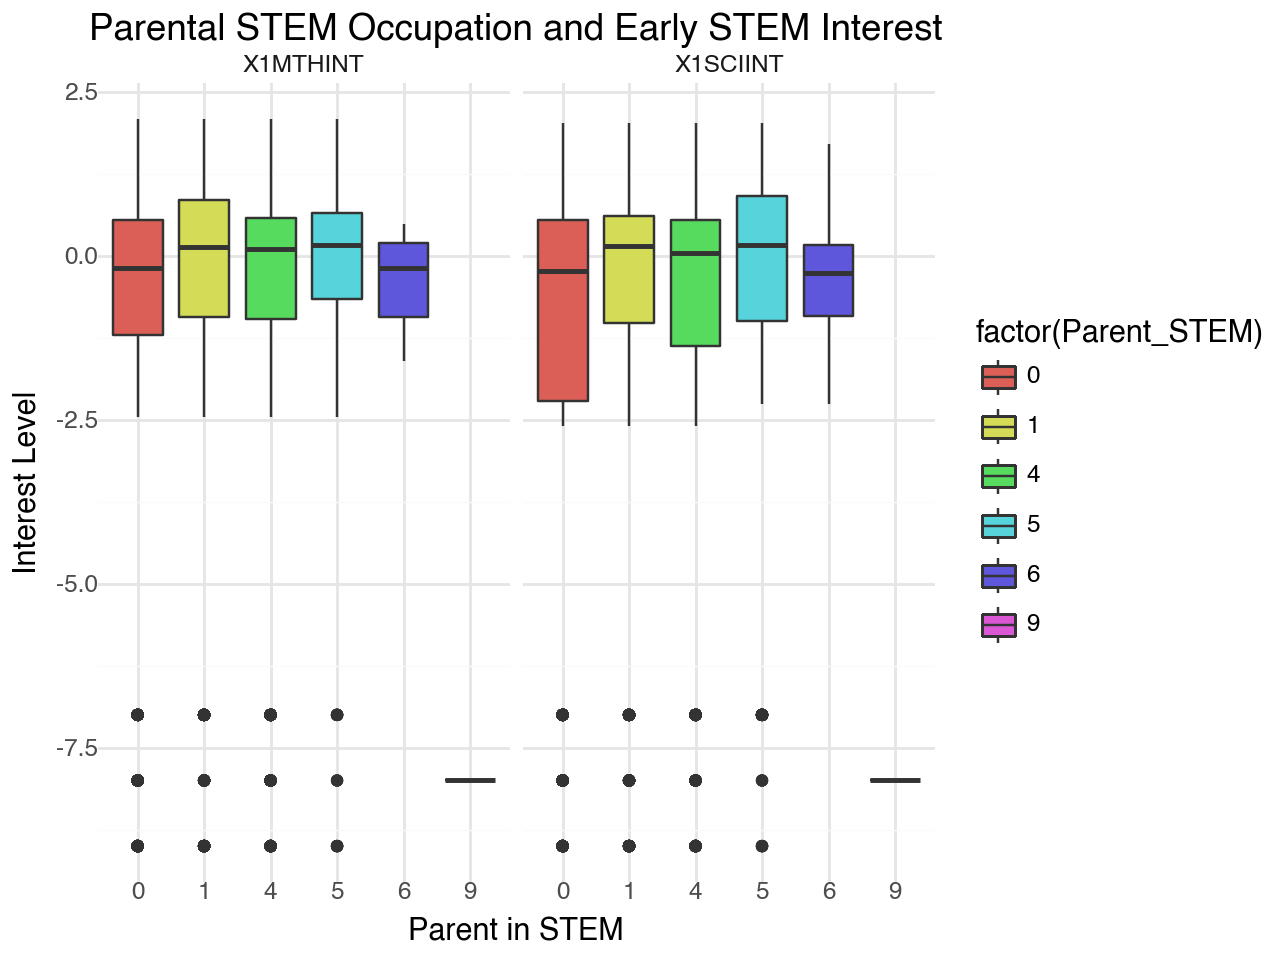

In [4]:
# Data Preprocessing
df_stem_interest = df.copy()

# Replace negative values in parental occupation
df_stem_interest['Parent_STEM'] = df_stem_interest[['X1PAR1OCC_STEM1', 'X1PAR2OCC_STEM1']].max(axis=1)
df_stem_interest = df_stem_interest[df_stem_interest['Parent_STEM'] >= 0]

# Melt the interest columns for a combined view
df_melted_interest = pd.melt(df_stem_interest, id_vars=['Parent_STEM'], value_vars=['X1MTHINT', 'X1SCIINT'], var_name='Subject', value_name='Interest')

# Create the plot
plot1 = (
    ggplot(df_melted_interest, aes(x='factor(Parent_STEM)', y='Interest', fill='factor(Parent_STEM)'))
    + geom_boxplot()
    + facet_wrap('~Subject')
    + labs(title='Parental STEM Occupation and Early STEM Interest', x='Parent in STEM', y='Interest Level')
    + theme_minimal()
)

plot1.show()


C:\Users\chris\AppData\Local\Temp\ipykernel_28992\542955842.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


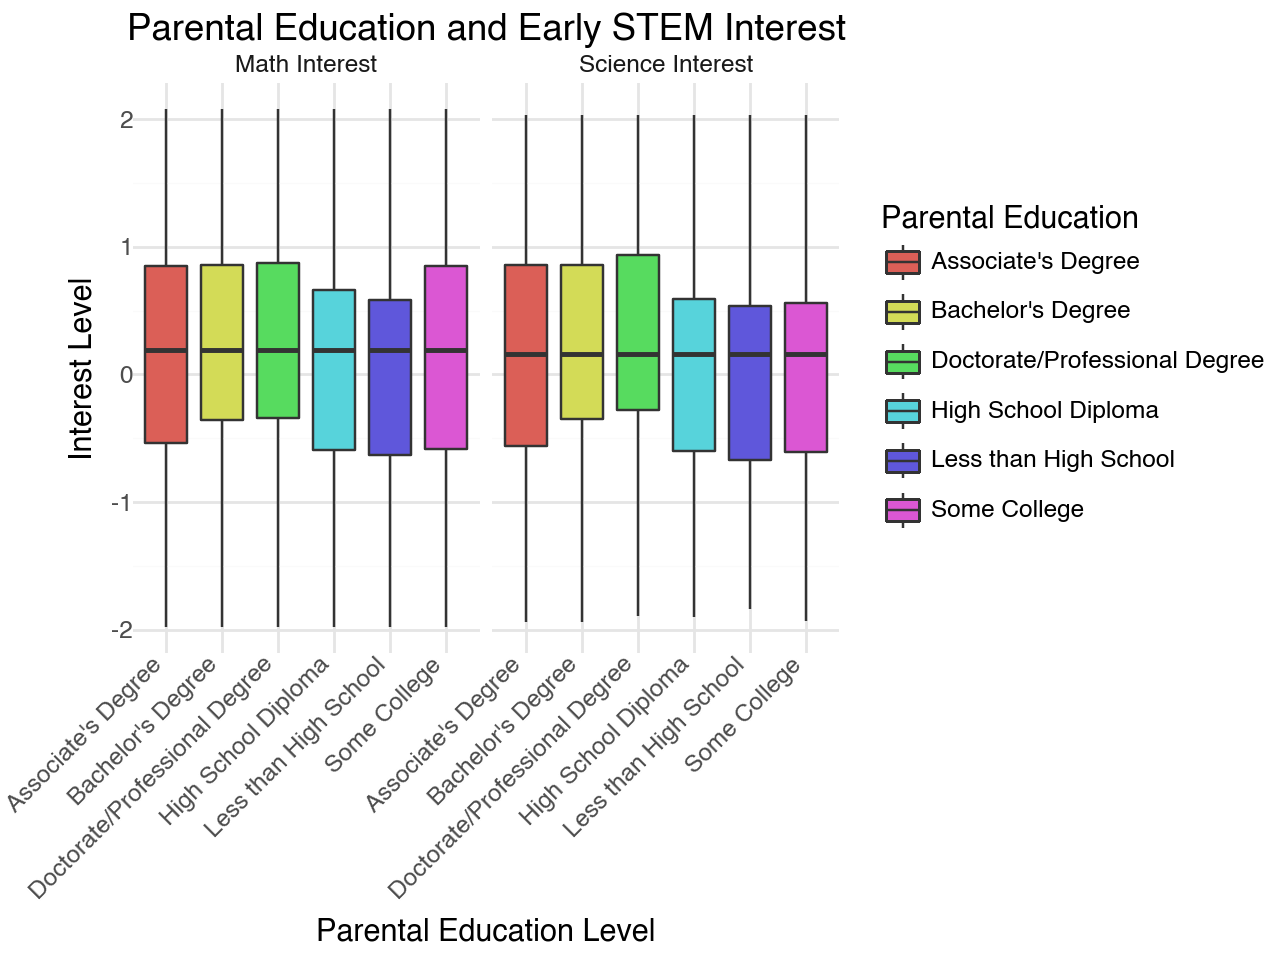

c:\users\chris\desktop\oru folder\fall 2024\gcsc 577\group4\python_unit_1\week_4_chris\venv477\lib\site-packages\plotnine\ggplot.py:606: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\users\chris\desktop\oru folder\fall 2024\gcsc 577\group4\python_unit_1\week_4_chris\venv477\lib\site-packages\plotnine\ggplot.py:607: PlotnineWarning: Filename: Parental Education vs Early STEM Interest


In [13]:
# Data Preprocessing
df_parent_edu = df[(df['X1PAREDU'] > 0) & (df['X1MTHINT'] >= -2) & (df['X1SCIINT'] >= -2)]

# Map parental education to labels
edu_labels = {
    1: 'Less than High School', 2: 'High School Diploma', 3: 'Some College',
    4: "Associate's Degree", 5: "Bachelor's Degree", 6: "Master's Degree", 7: "Doctorate/Professional Degree"
}
df_parent_edu['Parental Education'] = df_parent_edu['X1PAREDU'].map(edu_labels)

# Melt the interest columns for faceting
df_melted_edu = pd.melt(df_parent_edu, id_vars=['Parental Education'], value_vars=['X1MTHINT', 'X1SCIINT'], var_name='Subject', value_name='Interest')

subject_labels = {'X1MTHINT': 'Math Interest', 'X1SCIINT': 'Science Interest'}
df_melted_edu['Subject'] = df_melted_edu['Subject'].map(subject_labels)

# Create the plot
plot4 = (
    ggplot(df_melted_edu, aes(x='Parental Education', y='Interest', fill='Parental Education'))
    + geom_boxplot()
    + facet_wrap('~Subject')
    + labs(title='Parental Education and Early STEM Interest', x='Parental Education Level', y='Interest Level')
    + theme_minimal()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)

plot4.show()

plot4.save("Parental Education vs Early STEM Interest")

C:\Users\chris\AppData\Local\Temp\ipykernel_28992\976061250.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\chris\AppData\Local\Temp\ipykernel_28992\976061250.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\chris\AppData\Local\Temp\ipykernel_28992\976061250.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

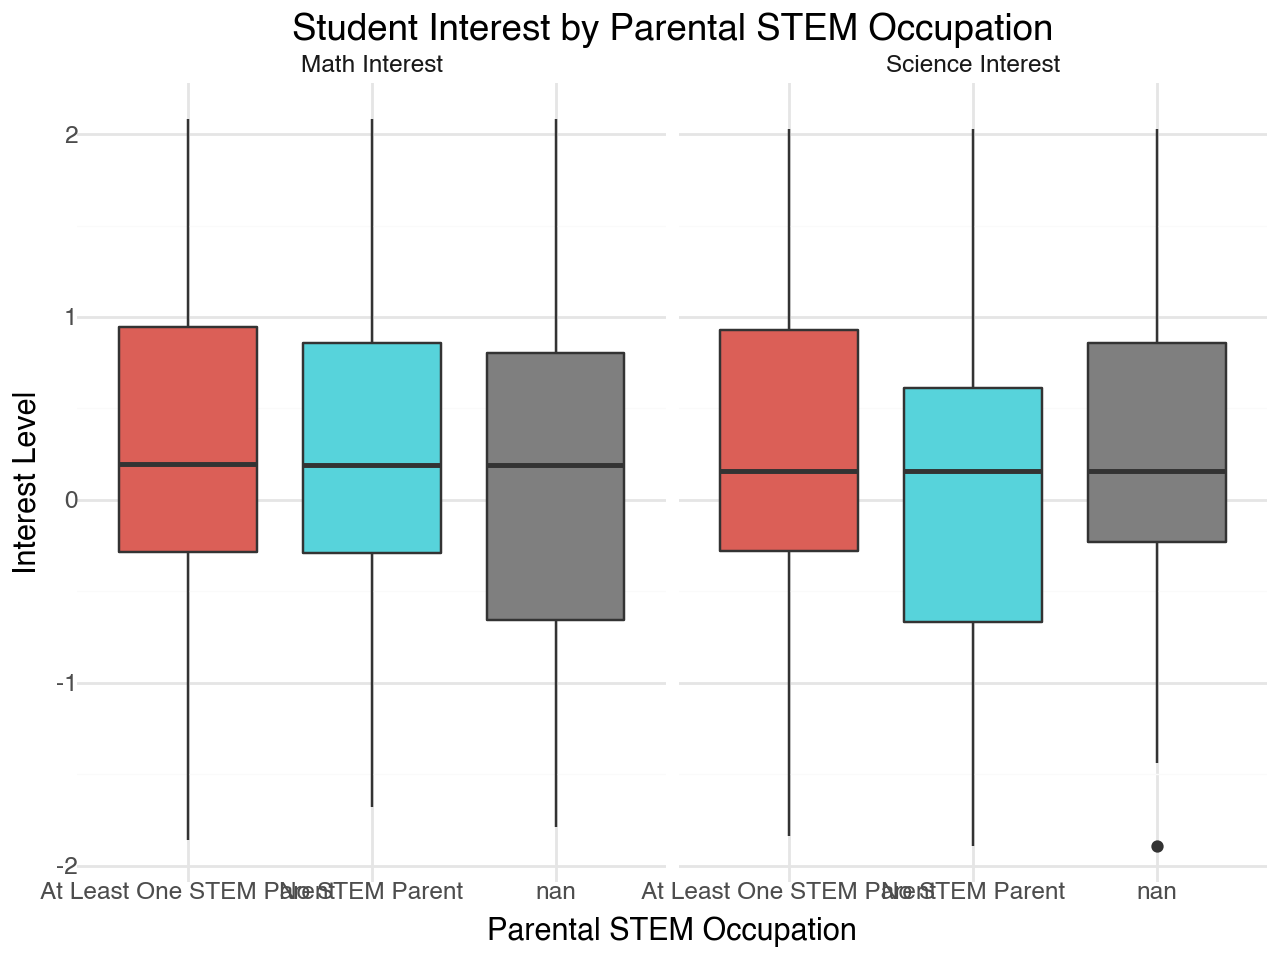

In [11]:
# Data Preprocessing
df_stem = df[(df['X1PAR1OCC_STEM1']) & (df['X1PAR2OCC_STEM1']) & (df['X1MTHINT'] >= -2) & (df['X1SCIINT'] >= -2)]

# Replace negative values in parental occupation with 0 (not STEM)
df_stem['X1PAR1OCC_STEM1'] = df_stem['X1PAR1OCC_STEM1'].apply(lambda x: 0 if x < 0 else x)
df_stem['X1PAR2OCC_STEM1'] = df_stem['X1PAR2OCC_STEM1'].apply(lambda x: 0 if x < 0 else x)

# Create a combined STEM parent indicator
df_stem['Parental STEM'] = df_stem[['X1PAR1OCC_STEM1', 'X1PAR2OCC_STEM1']].max(axis=1)
df_stem['Parental STEM'] = df_stem['Parental STEM'].map({0: 'No STEM Parent', 1: 'At Least One STEM Parent'})

# Melt the interest variables for faceted plotting
df_melted = pd.melt(df_stem, id_vars=['Parental STEM'], value_vars=['X1MTHINT', 'X1SCIINT'], var_name='Subject', value_name='Interest')

# Map subject codes to labels
subject_labels = {'X1MTHINT': 'Math Interest', 'X1SCIINT': 'Science Interest'}
df_melted['Subject'] = df_melted['Subject'].map(subject_labels)

# Create the plot
plot5 = (
    ggplot(df_melted, aes(x='Parental STEM', y='Interest', fill='Parental STEM'))
    + geom_boxplot()
    + facet_wrap('~Subject')
    + labs(title='Student Interest by Parental STEM Occupation', x='Parental STEM Occupation', y='Interest Level')
    + theme_minimal()
    + theme(legend_position='none')
)

plot5.show()
